In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('data.csv', sep=',')

In [ ]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


### Data Preprocessing

In [ ]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df['Sentiment'] = df['Sentiment'].str.lower().map({'positive': 'positive', 'negative': 'negative', 'neutral': 'neutral'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


### Exploratory Data Analysis (EDA)

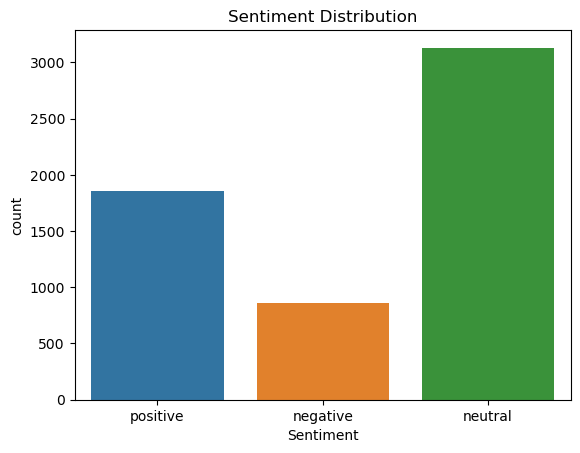

In [ ]:
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

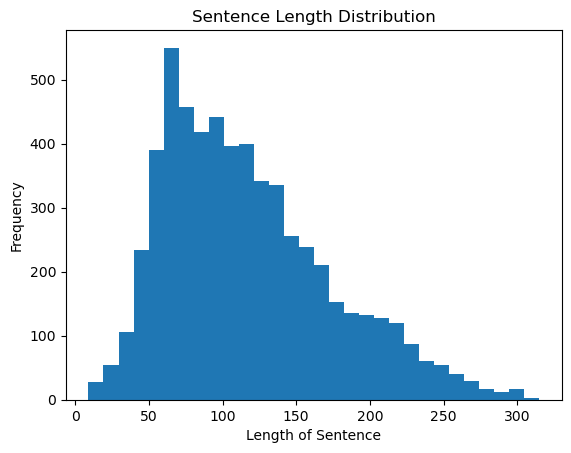

In [ ]:
df['sentence_length'] = df['Sentence'].apply(len)
plt.hist(df['sentence_length'], bins=30)
plt.title('Sentence Length Distribution')
plt.xlabel('Length of Sentence')
plt.ylabel('Frequency')
plt.show()

### Text Preprocessing

#### Text Cleaning

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
df['cleaned_text'] = df['Sentence'].apply(clean_text)
df.head()

,Sentence,Sentiment,sentence_length,cleaned_text
0,The GeoSolutions technology will leverage Bene...,positive,218,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,for the last quarter of componenta s net sales...
3,According to the Finnish-Russian Chamber of Co...,neutral,128,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,135,the swedish buyout firm has sold its remaining...


#### Tokenization

In [ ]:
df['tokens'] = df['cleaned_text'].apply(word_tokenize)
df.head()

,Sentence,Sentiment,sentence_length,cleaned_text,tokens
0,The GeoSolutions technology will leverage Bene...,positive,218,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,128,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ..."
4,The Swedish buyout firm has sold its remaining...,neutral,135,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r..."


#### Remove Stopwords

In [ ]:
def remove_stopwords(tokens):
    # Defining stopwords inside the function
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [ ]:
df['tokens_no_stopwords'] = df['tokens'].apply(remove_stopwords)
df.head()

,Sentence,Sentiment,sentence_length,cleaned_text,tokens,tokens_no_stopwords
0,The GeoSolutions technology will leverage Bene...,positive,218,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double..."
3,According to the Finnish-Russian Chamber of Co...,neutral,128,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,..."
4,The Swedish buyout firm has sold its remaining...,neutral,135,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce..."


#### Stemming

In [ ]:
stemmer = PorterStemmer()

In [ ]:
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

In [ ]:
df['stemmed_tokens'] = df['tokens_no_stopwords'].apply(stem_words)
df.head()

,Sentence,Sentiment,sentence_length,cleaned_text,tokens,tokens_no_stopwords,stemmed_tokens
0,The GeoSolutions technology will leverage Bene...,positive,218,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolut, technolog, leverag, benefon, gp, so..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibl]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubl, ..."
3,According to the Finnish-Russian Chamber of Co...,neutral,128,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[accord, finnishrussian, chamber, commerc, maj..."
4,The Swedish buyout firm has sold its remaining...,neutral,135,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remain, percent,..."


#### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

In [ ]:
df['lemmatized_tokens'] = df['tokens_no_stopwords'].apply(lemmatize_words)
df.head()

,Sentence,Sentiment,sentence_length,cleaned_text,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens
0,The GeoSolutions technology will leverage Bene...,positive,218,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolut, technolog, leverag, benefon, gp, so...","[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibl]","[esi, low, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubl, ...","[last, quarter, componenta, net, sale, doubled..."
3,According to the Finnish-Russian Chamber of Co...,neutral,128,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[accord, finnishrussian, chamber, commerc, maj...","[according, finnishrussian, chamber, commerce,..."
4,The Swedish buyout firm has sold its remaining...,neutral,135,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remain, percent,...","[swedish, buyout, firm, sold, remaining, perce..."


### Word Cloud

In [ ]:
positive_sentences = ' '.join(df[df['Sentiment'] == 'positive']['cleaned_text'])
negative_sentences = ' '.join(df[df['Sentiment'] == 'negative']['cleaned_text'])
neutral_sentences = ' '.join(df[df['Sentiment'] == 'neutral']['cleaned_text'])

In [ ]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

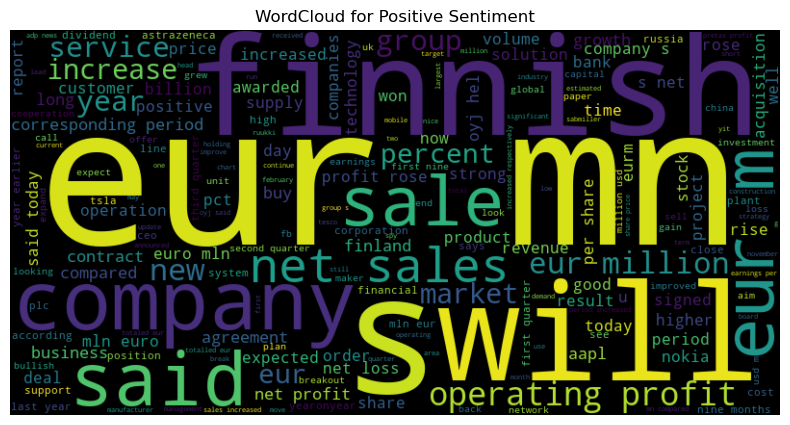

In [ ]:
generate_wordcloud(positive_sentences, 'WordCloud for Positive Sentiment')

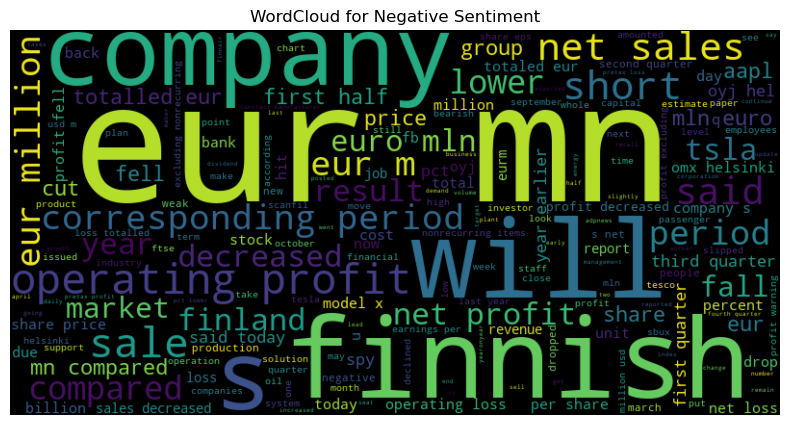

In [ ]:
generate_wordcloud(negative_sentences, 'WordCloud for Negative Sentiment')

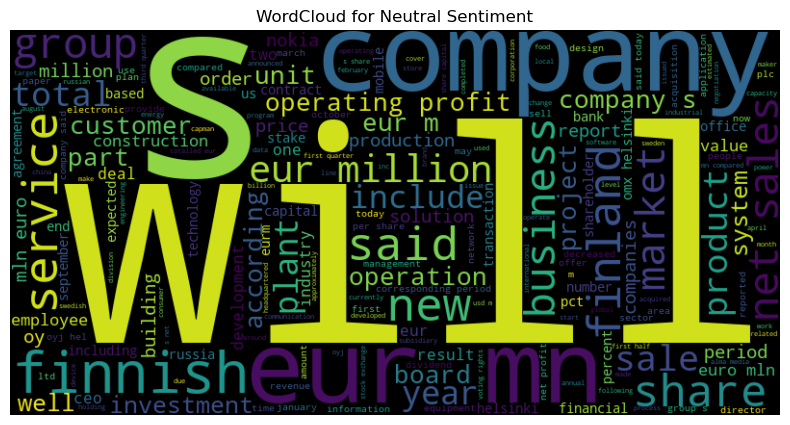

In [ ]:
generate_wordcloud(neutral_sentences, 'WordCloud for Neutral Sentiment')

### Split Data

In [ ]:
X = df['cleaned_text']
y = df['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train and Evaluate the Models

#### Vectorize the text data using TF-IDF

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#### Logistic Regression

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
logreg_pred = logreg_model.predict(X_test_tfidf)

In [ ]:
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred, average='weighted')
logreg_recall = recall_score(y_test, logreg_pred, average='weighted')
logreg_f1 = f1_score(y_test, logreg_pred, average='weighted')

In [ ]:
print(f"Logistic Regression - Accuracy: {logreg_accuracy:.4f}")
print(f"Logistic Regression - Precision: {logreg_precision:.4f}")
print(f"Logistic Regression - Recall: {logreg_recall:.4f}")
print(f"Logistic Regression - F1 Score: {logreg_f1:.4f}")

Logistic Regression - Accuracy: 0.7211
Logistic Regression - Precision: 0.7005
Logistic Regression - Recall: 0.7211
Logistic Regression - F1 Score: 0.6895


#### Naive Bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
nb_pred = nb_model.predict(X_test_tfidf)

In [ ]:
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

In [ ]:
print(f"Naive Bayes - Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes - Precision: {nb_precision:.4f}")
print(f"Naive Bayes - Recall: {nb_recall:.4f}")
print(f"Naive Bayes - F1 Score: {nb_f1:.4f}")

Naive Bayes - Accuracy: 0.6595
Naive Bayes - Precision: 0.6987
Naive Bayes - Recall: 0.6595
Naive Bayes - F1 Score: 0.5944


#### Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf_model.predict(X_test_tfidf)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

In [ ]:
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest - Precision: {rf_precision:.4f}")
print(f"Random Forest - Recall: {rf_recall:.4f}")
print(f"Random Forest - F1 Score: {rf_f1:.4f}")

Random Forest - Accuracy: 0.6536
Random Forest - Precision: 0.6357
Random Forest - Recall: 0.6536
Random Forest - F1 Score: 0.6320


### Compare models

In [ ]:
model_comparison = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [logreg_accuracy, nb_accuracy, rf_accuracy],
    'Precision': [logreg_precision, nb_precision, rf_precision],
    'Recall': [logreg_recall, nb_recall, rf_recall],
    'F1 Score': [logreg_f1, nb_f1, rf_f1]
}

In [ ]:
model_comparison_df = pd.DataFrame(model_comparison)

In [ ]:
model_comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.721129,0.700509,0.721129,0.689538
1,Naive Bayes,0.659538,0.698657,0.659538,0.594418
2,Random Forest,0.653550,0.635747,0.653550,0.631967
